In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
training_set = pd.read_csv('Wordle.csv')
# print(training_set)
X = training_set.iloc[:,2:3].values
# X

In [11]:
# Define an alphabet
alphabet = "abcdefghijklmnopqrstuvwxyz"

# Vectorize a letter
def letter_to_vector(letter):
    vector = np.zeros(26)
    index = alphabet.index(letter)
    vector[index] = 1
    return vector

# Tensorize a word
def word_to_tensor(word):
    vectors = []
    for letter in word:
        vectors.append(letter_to_vector(letter))
    return np.array(vectors)


# Vectorize a word
def word_to_vector(word):
    vectors = []
    for letter in word:
        vectors.append(letter_to_vector(letter))
    return np.concatenate(vectors)


In [12]:
word_vec=[[ ],[ ],[ ],[ ]]
for i in range(len(X)):
    word=X[i][0]
    # Vectorize the words
    tensor = word_to_tensor(word)
    vector = word_to_vector(word)
    word_vec[0].append(word)
    word_vec[1].append(tensor)
    word_vec[2].append(vector)
word_vec

[['slump',
  'crank',
  'gorge',
  'query',
  'drink',
  'favor',
  'abbey',
  'tangy',
  'panic',
  'solar',
  'shire',
  'proxy',
  'point',
  'robot',
  'prick',
  'wince',
  'crimp',
  'knoll',
  'sugar',
  'whack',
  'mount',
  'perky',
  'could',
  'wrung',
  'light',
  'those',
  'moist',
  'shard',
  'pleat',
  'aloft',
  'skill',
  'elder',
  'frame',
  'humor',
  'pause',
  'ulcer',
  'ultra',
  'robin',
  'cynic',
  'aroma',
  'caulk',
  'shake',
  'dodge',
  'swill',
  'tacit',
  'other',
  'thorn',
  'trove',
  'bloke',
  'vivid',
  'spill',
  'chant',
  'choke',
  'rupee',
  'nasty',
  'mourn',
  'ahead',
  'brine',
  'cloth',
  'hoard',
  'sweet',
  'month',
  'lapse',
  'watch',
  'today',
  'focus',
  'smelt',
  'tease',
  'cater',
  'movie',
  'saute',
  'allow',
  'renew',
  'their',
  'slosh',
  'purge',
  'chest',
  'depot',
  'epoxy',
  'nymph',
  'found',
  'shall',
  'stove',
  'lowly',
  'snout',
  'trope',
  'fewer',
  'shawl',
  'natal',
  'comma',
  'foray',

In [13]:
# Calculate the Euclid distance of words
with open('points','w+') as f:
    for i in range(len(word_vec[0])):
        for j in range(len(word_vec[0])):
            dist = np.linalg.norm(word_vec[1][i] - word_vec[1][j])
            print(word_vec[0][i],',',word_vec[0][j],',', dist,file=f)

E:\anaconda3\envs\pytorch1-13-1py3-7\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
E:\anaconda3\envs\pytorch1-13-1py3-7\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


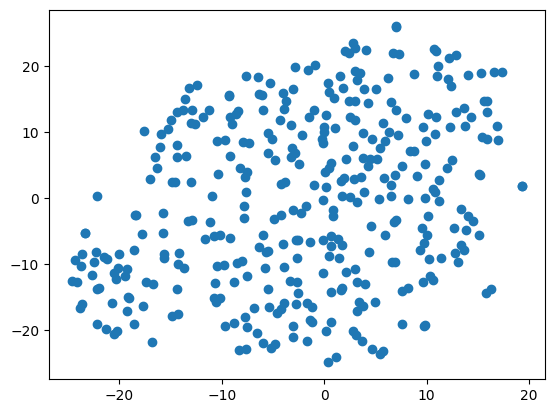

[[  5.7236395   11.441175  ]
 [  9.9168005    8.663659  ]
 [  1.5000547   -9.0452385 ]
 [  4.677852   -22.889572  ]
 [  5.209557     6.0010247 ]
 [-15.592154    -9.008603  ]
 [-23.795893   -16.61752   ]
 [ -4.2186418  -16.855251  ]
 [-10.595991   -15.769393  ]
 [ 10.881657    22.317078  ]
 [  2.5675113   12.378416  ]
 [ -7.5755286    3.91823   ]
 [ 15.135848    -5.6031523 ]
 [  6.877638    -9.717109  ]
 [  2.1246467    6.025411  ]
 [ -2.7418654   -6.3339157 ]
 [  8.433868     7.183754  ]
 [-12.40732     17.14608   ]
 [ 12.152658    21.335146  ]
 [ -4.2516737    2.1905382 ]
 [ 12.802843    -8.384625  ]
 [  0.23267828 -20.208643  ]
 [ 10.252256    -9.206127  ]
 [  7.2043858    9.667808  ]
 [-18.398571    -2.5498552 ]
 [ -2.2068834    9.5546465 ]
 [ 13.868383    -4.791704  ]
 [  3.9353907   16.64463   ]
 [ 15.921501    13.023751  ]
 [-14.908523    11.831038  ]
 [  2.0303993   22.399635  ]
 [-24.165735   -12.79316   ]
 [  6.8794208    3.5144863 ]
 [-18.591473    -7.8620334 ]
 [ -3.0636613 

In [14]:
from sklearn.manifold import TSNE
tsneData = TSNE().fit_transform(word_vec[2])
#Visualize the distance of words
f = plt.figure
ax = plt.subplot(aspect='auto')
sc = ax.scatter(tsneData[:,0], tsneData[:,1])
plt.show()
print(tsneData)

In [15]:
from sklearn.cluster import KMeans
n_clusters=1
cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(word_vec[2])
centroid=cluster.cluster_centers_
dist_min = np.linalg.norm(word_vec[2][0] - centroid)
dist_min_word = [word_vec[0][0]]
for i in range(len(word_vec[0])):
    dist = np.linalg.norm(word_vec[2][i] - centroid)
    if(dist<dist_min):
        dist_min = dist
        dist_min_word = word_vec[0][i]
    elif(dist==dist_min):
        dist_min_word.append(word_vec[0][i])
    print('The best bigin guess: ',dist_min_word)
    

最优初始值为： ['slump', 'slump']
最优初始值为： crank
最优初始值为： gorge
最优初始值为： gorge
最优初始值为： gorge
最优初始值为： gorge
最优初始值为： gorge
最优初始值为： gorge
最优初始值为： gorge
最优初始值为： solar
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为： shire
最优初始值为：

In [16]:
n_clusters=5
cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(word_vec[2])
centroid=cluster.cluster_centers_
y_pred = cluster.labels_
# Label the words with Euclid distance
words=[]
Y=[1,2,3,4,5,6,7]
centtrod = cluster.cluster_centers_
color=['blue','orange','green','purple','brown','pink','gray','olive','cyan']
# for i in range(n_clusters):